In [1]:
import pandas as pd
import matplotlib.pyplot as plt
X = pd.read_csv('train_X.csv',usecols=['title'])
y = pd.read_csv('train_y.csv',usecols=['Label'])
X.head()

,title
0,Mark Hamill pays emotional tribute to Carrie F...
1,Blake Lively Wears Bow Tie and Blazer Dress at...
2,Shaunie O'Neal
3,Review of new Jennifer Lopez and Vanessa Hudge...
4,Kendall Jenner pictured kissing Gigi and Bella...


In [2]:
X.loc[0,'title']

"Mark Hamill pays emotional tribute to Carrie Fisher at 'Star Wars' gathering"

In [3]:
len(X)

10759

# Data Exploration

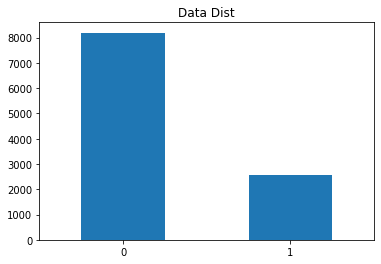

In [4]:
y.Label.value_counts().plot(kind='bar',rot=0);
plt.title('Data Dist');

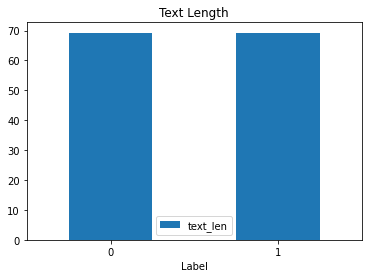

In [5]:
all_data = X.merge(y,right_index=True,left_index=True)
all_data['text_len'] = all_data.title.str.len()
all_data.groupby('Label').agg({'text_len':'mean'}).plot(kind='bar',rot=0,title='Text Length');

In [6]:
from spacy import displacy
import spacy
nlp = spacy.load("en")

sample = 0
displacy.render(nlp(all_data.loc[sample]['title']), style = "ent",jupyter = True)

In [7]:
from collections import defaultdict


tags_dict = {'fake': defaultdict(int), 'not_fake': defaultdict(int)}
unique_tags_dict = {'fake': defaultdict(int), 'not_fake': defaultdict(int)}
label_resolver = {1:'fake', 0:'not_fake'}

for _,label,text in all_data[['Label','title']].itertuples():
    if _ % 1000==0 and _ !=0:
        print(f'proccees {_} rows')
    ents = nlp.pipe([text], disable=["tagger", "parser"])
    for word in ents:
        unique_tags = set([i.label_ for i in word.ents])
        for unique_tag in unique_tags:
            unique_tags_dict[label_resolver[label]][unique_tag] +=1
            
        for tag in word.ents:
            tags_dict[label_resolver[label]][tag.label_] +=1

proccees 1000 rows
proccees 2000 rows
proccees 3000 rows
proccees 4000 rows
proccees 5000 rows
proccees 6000 rows
proccees 7000 rows
proccees 8000 rows
proccees 9000 rows
proccees 10000 rows


,fake,not_fake,fake (unique count),not_fake (unique count)
CARDINAL,2.50%,4.60%,3.13%,5.45%
DATE,3.42%,6.28%,4.18%,7.45%
EVENT,0.70%,1.43%,0.91%,1.75%
FAC,0.61%,0.99%,0.80%,1.20%
GPE,5.57%,5.18%,6.54%,5.92%
LANGUAGE,0.02%,0.02%,0.03%,0.03%
LAW,0.07%,0.10%,0.09%,0.13%
LOC,0.46%,0.55%,0.60%,0.66%
MONEY,1.25%,1.04%,1.59%,1.23%
NORP,1.80%,1.46%,2.19%,1.72%


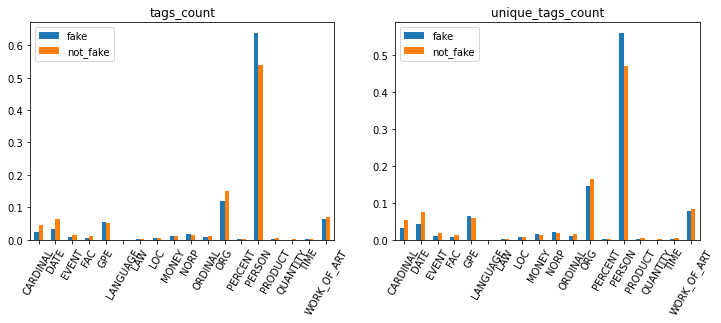

In [8]:
fig, axes = plt.subplots(1, 2,figsize=(12,4))

tags_df = pd.DataFrame(tags_dict)
tags_df = tags_df/tags_df.sum()
tags_df = tags_df.sort_index()
tags_df.plot(kind='bar',title='tags_count',ax=axes[0],rot=60);

for col in tags_df:
    tags_df[col] = tags_df[col].map("{:.2%}".format)


unique_tags_df = pd.DataFrame(unique_tags_dict)
unique_tags_df = unique_tags_df / unique_tags_df.sum()
unique_tags_df = unique_tags_df.sort_index()
unique_tags_df.plot(kind='bar',title='unique_tags_count',ax=axes[1],rot=60);


unique_tags_df = unique_tags_df.add_suffix(' (unique count)')

for col in unique_tags_df:
    unique_tags_df[col] = unique_tags_df[col].map("{:.2%}".format)
tags_df.merge(unique_tags_df,left_index=True,right_index=True)

In [9]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('punkt') # for sent_tokenize
nltk.download('stopwords') 
nltk.download('wordnet') # for WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/aloncohen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aloncohen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aloncohen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Setting random seed
seed = 123
# Data manipulation/analysis
import numpy as np
import pandas as pd
# Data partitioning
from sklearn.model_selection import train_test_split
# Text preprocessing/analysis
import re
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context='talk', 

        palette=['#D44D5C', '#43AA8B'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X['title'], y['Label'], test_size=0.2, random_state=42)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [12]:
# Prepare training corpus into one giant string
train_string = " ".join(X_train.values)
print(f"***** Extract of train_string ***** \n{train_string[:101]}", "\n")
# Split train_corpus by white space
splits = train_string.split()  
print(f"***** Extract of splits ***** \n{splits[:18]}\n")

***** Extract of train_string ***** 
Radical Muslims in Australia OFFENDED That Their Children Have to Sing the National Anthem WATCH: Sne 

***** Extract of splits ***** 
['Radical', 'Muslims', 'in', 'Australia', 'OFFENDED', 'That', 'Their', 'Children', 'Have', 'to', 'Sing', 'the', 'National', 'Anthem', 'WATCH:', 'Sneak', 'Peek:', 'Next']



In [13]:
print(f"Number of strings: {len(splits)}")
print(f"Number of unique strings: {len(set(splits))}")

Number of strings: 97096
Number of unique strings: 21513


In [14]:
freq_splits = FreqDist(splits)
print(f"***** 10 most common strings ***** \n{freq_splits.most_common(10)}", "\n")

***** 10 most common strings ***** 
[('and', 1601), ('to', 1473), ('the', 1341), ('of', 1066), ('in', 936), ('on', 843), ('a', 831), ('The', 763), ('Is', 679), ('for', 666)] 



In [15]:
short = set(s for s in splits if len(s)<4)
short = [(s, freq_splits[s]) for s in short]
short.sort(key=lambda x:x[1], reverse=True)
short[0:10]

[('and', 1601),
 ('to', 1473),
 ('the', 1341),
 ('of', 1066),
 ('in', 936),
 ('on', 843),
 ('a', 831),
 ('The', 763),
 ('Is', 679),
 ('for', 666)]

In [16]:
long = set(s for s in splits if len(s)>15)
long = [(s, freq_splits[s]) for s in long]
long.sort(key=lambda x:x[1], reverse=True)
long[0:10]

[('Zolciak-Biermann', 9),
 ('Behind-the-Scenes', 6),
 ('BravoRealHousewives', 3),
 ('Behind-The-Scenes', 2),
 ('Huntington-Whiteley', 2),
 ('behind-the-scenes', 2),
 ('Never-Before-Seen', 2),
 ('HillaryClinton.com', 1),
 ('British-philanthropist', 1),
 ('Environmentalist', 1)]

In [17]:
print(f"characterisation: {sum([c for s, c in long if re.match(r'characterisation*', s.lower())])} strings")
print(f"characterization: {sum([c for s, c in long if re.match(r'characterization*', s.lower())])} strings")

characterisation: 0 strings
characterization: 0 strings


In [18]:
def summarise(pattern, strings, freq):
    """Summarise strings matching a pattern."""
    # Find matches
    compiled_pattern = re.compile(pattern)
    matches = [s for s in strings if compiled_pattern.search(s)]
    
    # Print volume and proportion of matches
    print("{} strings, that is {:.2%} of total".format(len(matches), len(matches)/ len(strings)))
    
    # Create list of tuples containing matches and their frequency
    output = [(s, freq[s]) for s in set(matches)]
    output.sort(key=lambda x:x[1], reverse=True)
    
    return output
# Find strings possibly containing html tag
summarise(r"/?>?w*<|/>", splits, freq_splits)

0 strings, that is 0.00% of total


[]

In [19]:
summarise(r"\d", splits, freq_splits)

1911 strings, that is 1.97% of total


[('2018', 207),
 ('2017', 116),
 ('2', 72),
 ('3', 68),
 ('5', 63),
 ('2018:', 57),
 ('10', 44),
 ('2017:', 38),
 ('7', 33),
 ('8', 33),
 ('15', 27),
 ('4', 26),
 ('13', 26),
 ('20', 25),
 ('9', 24),
 ('12', 22),
 ('6', 22),
 ('1', 22),
 ('11', 19),
 ('14', 15),
 ('$1', 14),
 ('25', 14),
 ('50', 13),
 ('17', 13),
 ('30', 11),
 ('100', 10),
 ('21', 10),
 ('22', 9),
 ('18', 9),
 ('4th', 9),
 ('2019', 9),
 ('2:', 8),
 ('2016', 8),
 ('21st', 8),
 ('19', 8),
 ('16', 8),
 ('2020', 8),
 ('40', 7),
 ('$2', 7),
 ('1st', 7),
 ('2’', 7),
 ('39', 6),
 ("3'", 6),
 ('27', 6),
 ('$10', 6),
 ('2018?', 5),
 ('2011', 5),
 ('$100,000', 5),
 ('70', 5),
 ('$100', 5),
 ('7)', 5),
 ("'70s", 5),
 ('60th', 5),
 ('2019:', 5),
 ('$20', 5),
 ('10th', 4),
 ('$8', 4),
 ('#3', 4),
 ('50th', 4),
 ('26', 4),
 ('‘4:44’', 4),
 ('$5', 4),
 ('73', 4),
 ('2013', 4),
 ('31', 4),
 ("2'", 4),
 ('2008', 4),
 ('32', 3),
 ('24', 3),
 ('2-Year-Old', 3),
 ('5:', 3),
 ('4)', 3),
 ('41st', 3),
 ('Tech2', 3),
 ('2017,', 3),
 ('3’', 3

In [20]:
summarise(r"\w+-+\w+", splits, freq_splits)

895 strings, that is 0.92% of total


[('Jay-Z', 29),
 ('Star-Studded', 14),
 ('Comic-Con', 13),
 ('A-Rod', 11),
 ('Co-Star', 10),
 ('Ex-Husband', 9),
 ('Zolciak-Biermann', 9),
 ('JAY-Z', 8),
 ('Co-Stars', 8),
 ('Tell-All', 7),
 ('A-List', 6),
 ('co-star', 6),
 ('Zeta-Jones', 6),
 ("Jay-Z's", 6),
 ('Behind-the-Scenes', 6),
 ('post-baby', 5),
 ('X-Files', 5),
 ('Mary-Kate', 5),
 ('Post-Baby', 4),
 ('Spin-Off', 4),
 ('ex-wife', 4),
 ('Ex-Girlfriend', 4),
 ('best-dressed', 4),
 ('G-Eazy', 4),
 ('Jolie-Pitt', 3),
 ('Co-Host', 3),
 ('2-Year-Old', 3),
 ('real-life', 3),
 ('Skin-Care', 3),
 ('Spot-On', 3),
 ('Look-Alike', 3),
 ('Newton-John', 3),
 ('Break-Up', 3),
 ('12-Year', 3),
 ('Ex-Boyfriend', 3),
 ('T-shirt', 3),
 ('Live-Action', 3),
 ("JAY-Z's", 3),
 ('3-Year', 3),
 ('Jaw-Droppers', 3),
 ('Jay-Z’s', 3),
 ('Jaw-Dropping', 3),
 ('Lin-Manuel', 3),
 ('Must-Have', 2),
 ('Six-Pack', 2),
 ('Pose-Off:', 2),
 ('2-Year', 2),
 ('B-Stage', 2),
 ('3-Year-Old', 2),
 ('Anti-Trump', 2),
 ('rom-com', 2),
 ('Dance-Off', 2),
 ('Fact-Checking

In [21]:
summarise(r"\w+[_!&/)(<\|}{\[\]]\w+", splits, freq_splits)

46 strings, that is 0.05% of total


[('P!nk', 3),
 ('H&M', 3),
 ('Q&A:', 2),
 ('Q&A', 2),
 ('PrE!pared:', 1),
 ('Actor/Film', 1),
 ('seniors_selfhelp', 1),
 ('Capshaw/Sarah', 1),
 ('08/30/18', 1),
 ('Did&amp;quot;', 1),
 ('Pact&quot;', 1),
 ('ET/PT', 1),
 ('&quot;Sexual&quot;', 1),
 ('S&M-themed', 1),
 ('Fitz/Hunter', 1),
 ('3/1/2018', 1),
 ('R&B', 1),
 ('Eternity&quot;?', 1),
 ('20/20', 1),
 ('9/11', 1),
 ('9/10/09', 1),
 ('Arya/Brienne', 1),
 ('Disney/Fox', 1),
 ('&amp;quot;Scapegoat&amp;quot;', 1),
 ('Wilson/Liam', 1),
 ('R&B/Pop', 1),
 ('Kardashian/Jenner', 1),
 ('AT&T,', 1),
 ('All&quot;', 1),
 ('05/27/99', 1),
 ('Hemsworth/Priyanka', 1),
 ('1/3', 1),
 ("M&M's", 1),
 ('Life&quot;', 1),
 ('L&S:', 1),
 ('E!Q', 1),
 ('EST/5', 1),
 ('LexisNexis(R)', 1),
 ('Freak&quot;', 1),
 ('24/7', 1)]

In [22]:
def find_outlaw(word):
    """Find words that contain a same character 3+ times in a row."""
    is_outlaw = False
    for i, letter in enumerate(word):
        if i > 1:
            if word[i] == word[i-1] == word[i-2] and word[i].isalpha():
                is_outlaw = True
                break
    return is_outlaw
outlaws = [s for s in splits if find_outlaw(s)]
print("{} strings, that is {:.2%} of total".format(len(outlaws), len(outlaws)/ len(splits)))
outlaw_freq = [(s, freq_splits[s]) for s in set(outlaws)]
outlaw_freq.sort(key=lambda x:x[1], reverse=True)
outlaw_freq

10 strings, that is 0.01% of total


[('Okurrr', 1),
 ("'Bruvaaa'", 1),
 ('‘Ewwww!’', 1),
 ('XXXTentacion’s', 1),
 ('XXXTentacion', 1),
 ('XXXVIII', 1),
 ('Baaaack!', 1),
 ('VIII', 1),
 ('‘MMMBop’?', 1),
 ('III:', 1)]

In [23]:
tokeniser = RegexpTokenizer("[A-Za-z]+")
tokens = tokeniser.tokenize(train_string)
print(tokens[:20], "\n")

['Radical', 'Muslims', 'in', 'Australia', 'OFFENDED', 'That', 'Their', 'Children', 'Have', 'to', 'Sing', 'the', 'National', 'Anthem', 'WATCH', 'Sneak', 'Peek', 'Next', 'Week', 'on'] 



In [24]:
print(f"Number of tokens: {len(tokens)}")
print(f"Number of unique tokens: {len(set(tokens))}")

Number of tokens: 98532
Number of unique tokens: 14584


In [25]:
lemmatiser = WordNetLemmatizer()
tokens_norm = [lemmatiser.lemmatize(t.lower(), "v") for t in tokens]
print(f"Number of unique tokens: {len(set(tokens_norm))}")

Number of unique tokens: 9662


Average number of characters per token: 4.9128


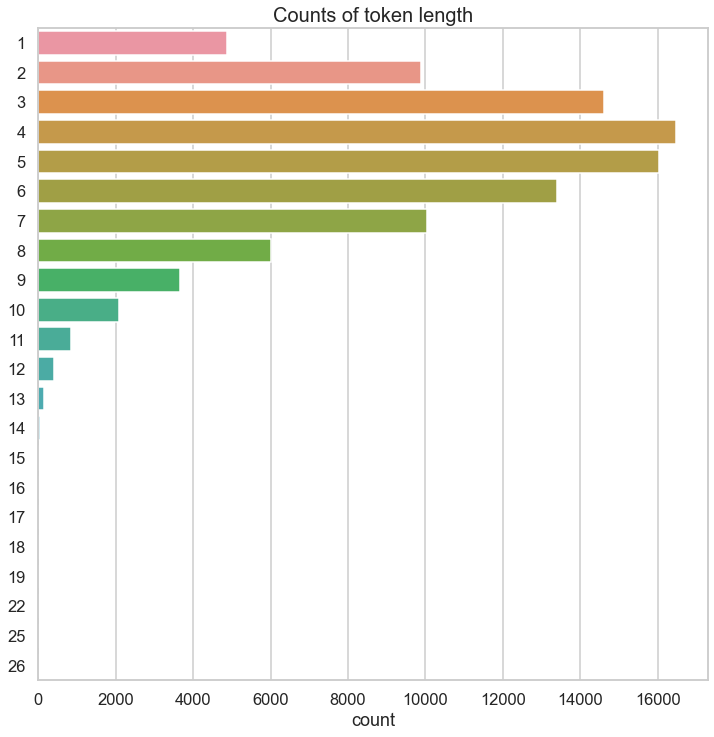

In [26]:
# Create list of token lengths for each token
token_length = [len(t) for t in tokens]
# Average number of characters per token
print(f"Average number of characters per token: {round(np.mean(token_length),4)}")
# Plot distribution
plt.figure(figsize=(12, 12))
sns.countplot(y=token_length)
plt.title("Counts of token length", size=20);

In [27]:
pd.DataFrame(data=token_length, columns=['length']).query("length>10").value_counts().head()

length
11        841
12        396
13        158
14         35
15         10
dtype: int64

In [28]:
[t for t in tokens if len(t)>=18]

['TaylorSwiftIsOverParty',
 'clicksmileworldwide',
 'BravoRealHousewives',
 'alternativemediasyndicate',
 'Betterelationships',
 'BravoRealHousewives',
 'BravoRealHousewives',
 'emmastoneandandrewgarfield']

In [29]:
stop_words = stopwords.words("english")
print(f"There are {len(stop_words)} stopwords.\n")
print(stop_words)

There are 179 stopwords.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own

In [30]:
stop_words.extend(["cannot", "could", "done", "let", "may" "mayn",  "might", "must", "need", "ought", "oughtn", "shall", "would", "br"])
print(f"There are {len(stop_words)} stopwords.\n")

There are 192 stopwords.



In [31]:
freq_stopwords = [(sw, tokens_norm.count(sw)) for sw in stop_words]
freq_stopwords.sort(key=lambda x: x[1], reverse=True)
freq_stopwords[:10]

[('s', 2481),
 ('the', 2261),
 ('to', 1835),
 ('and', 1810),
 ('be', 1698),
 ('of', 1231),
 ('in', 1207),
 ('a', 1197),
 ('on', 1060),
 ('with', 952)]

In [32]:
n_stopwords = len([t for t in tokens_norm if t in stop_words])
print(f"{n_stopwords} tokens are stop words.")
print(f"That is {round(100*n_stopwords/len(tokens_norm),2)}%.")

29020 tokens are stop words.
That is 29.45%.


In [33]:
tokens_clean = [t for t in tokens_norm if t not in stop_words]
print(f"Number of tokens: {len(tokens_clean)}")

Number of tokens: 69512


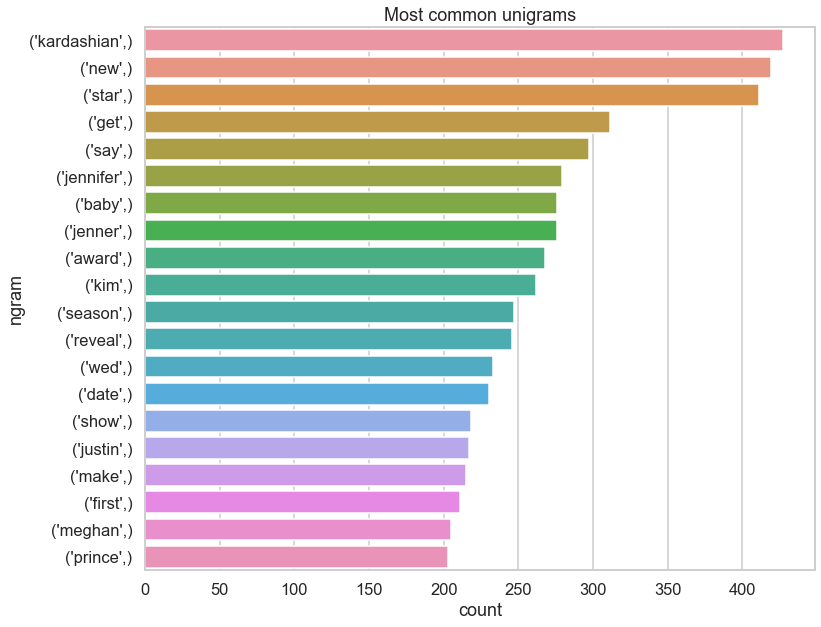

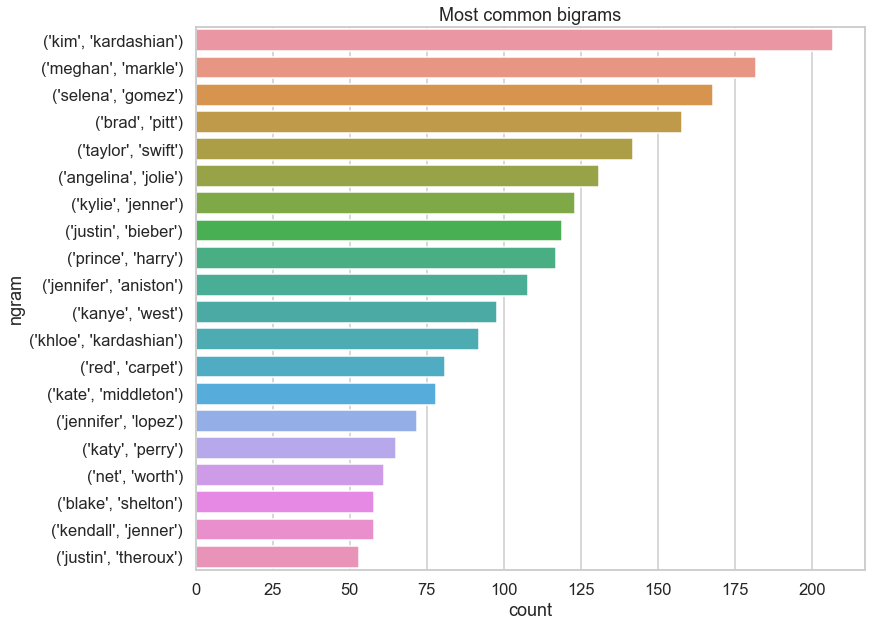

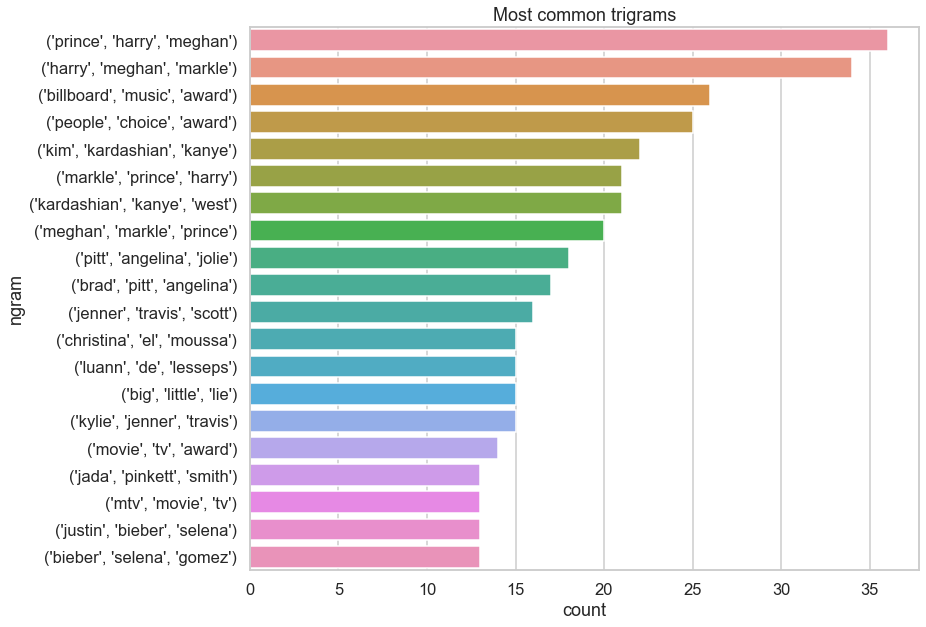

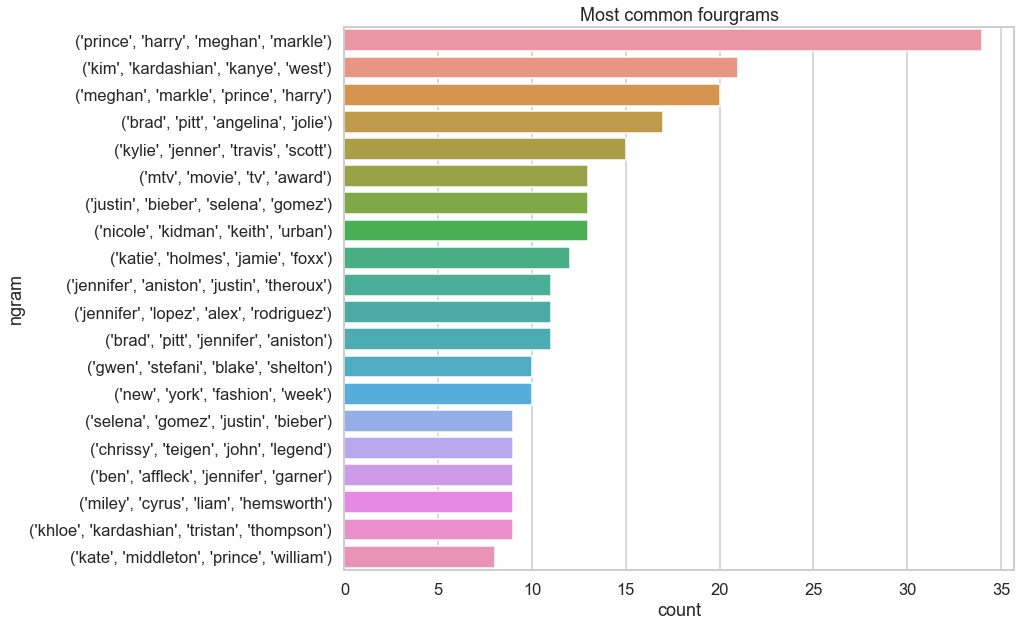

In [34]:
def preprocess_text(text):
    """Preprocess text into normalised tokens."""
    # Tokenise words into alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords
def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [preprocess_text(document) for document in corpus]
    
    # Find ngrams per document
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    
    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(12,10))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(train['title'], i))
    plt.title(f"Most common {mapping[i]}grams");

In [35]:
# tokeniser = RegexpTokenizer("[A-Za-z]+")
train["n_sentences"] = train["title"].apply(sent_tokenize).apply(len)
train["tokens"] = train["title"].apply(tokeniser.tokenize)
train["n_tokens"] = train["title"].apply(len)
train["n_characters"] = train["title"].apply(len)
train["n_stopwords"] = train["tokens"].apply(lambda tokens: len([t for t in tokens if t in stop_words]))
train["p_stopwords"] = train["n_stopwords"]/train["n_tokens"]
# Inspect head
columns = ['Label', 'n_sentences', 'n_tokens', 'n_characters', 'n_stopwords', 'p_stopwords']
train['Label'] = train['Label'].map({1:'fake',0:'not_fake'})
train[columns].head()

,Label,n_sentences,n_tokens,n_characters,n_stopwords,p_stopwords
625,fake,1,90,90,3,0.033333
8913,not_fake,1,58,58,2,0.034483
6502,not_fake,1,73,73,3,0.041096
5652,not_fake,1,36,36,1,0.027778
5684,fake,1,84,84,0,0.000000


In [36]:
num_vars = train.select_dtypes(np.number).columns
train.groupby("Label")[num_vars].agg(["mean", "median"])

n_sentences          n_tokens        n_characters        n_stopwords  \
                mean median       mean median         mean median        mean   
Label                                                                           
fake        1.103431      1  69.149510     69    69.149510     69    1.580882   
not_fake    1.057408      1  68.994975     68    68.994975     68    1.967261   

                p_stopwords            
         median        mean    median  
Label                                  
fake          1    0.022316  0.016667  
not_fake      2    0.027239  0.025316

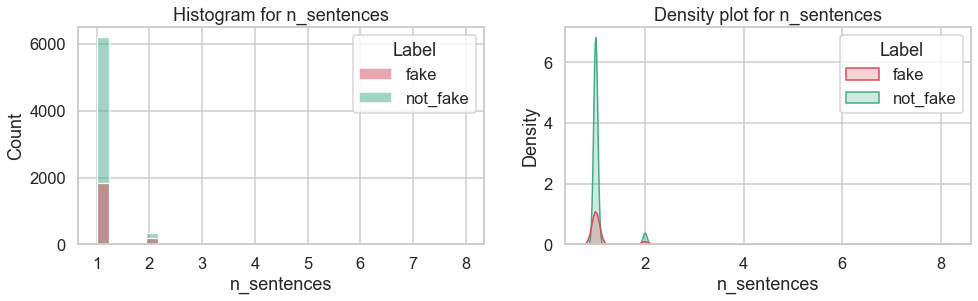

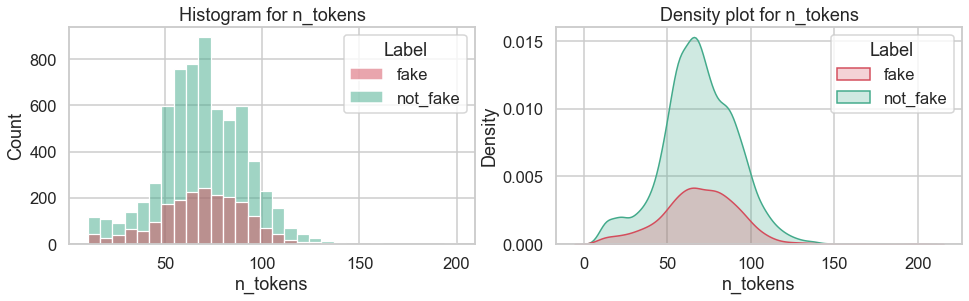

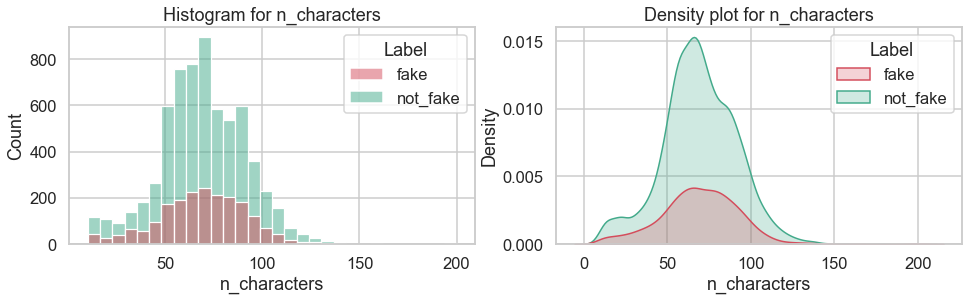

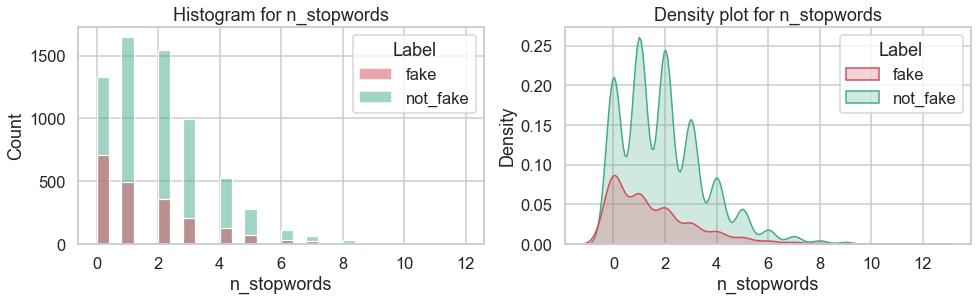

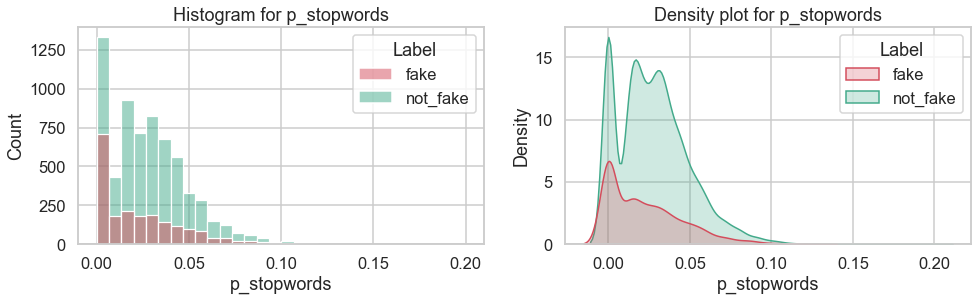

In [37]:
def plot_distribution(df, var, hue):
    """Plot overlayed histogram and density plot per sentiment."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,4])
    
    # Histogram
    sns.histplot(data=df, x=var, hue=hue, bins=30, kde=False, ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    # Density plot
    sns.kdeplot(data=df, x=var, hue=hue, shade=True, ax=ax[1])
    ax[1].set_title(f"Density plot for {var}");
    
# Plot for all numerical variables
for var in num_vars:
    plot_distribution(train, var, 'Label')


In [38]:
pos_documents = [preprocess_text(document) for document in train.loc[train['Label']=='fake', 'title']]
pos_tokens = [item for sublist in pos_documents for item in sublist]
pos_freq = FreqDist(pos_tokens)
pos_common = [word for word, frequency in pos_freq.most_common(20)]
print(f"***** 20 frequent tokens in Fake News: *****\n{pos_common}\n")
neg_documents = [preprocess_text(document) for document in train.loc[train['Label']=='not_fake', 'title']]
neg_tokens = [item for sublist in neg_documents for item in sublist]
neg_freq = FreqDist(neg_tokens)
neg_common = [word for word, frequency in neg_freq.most_common(20)]
print(f"***** 20 frequent tokens in Not Fake News: *****\n{neg_common}\n")
common = set(neg_common).union(pos_common)
print(f"***** Their union: *****\n{common}\n")

***** 20 frequent tokens in Fake News: *****
['kardashian', 'brad', 'jennifer', 'pitt', 'justin', 'jenner', 'angelina', 'jolie', 'kim', 'selena', 'new', 'aniston', 'gomez', 'meghan', 'baby', 'bieber', 'report', 'date', 'trump', 'rumor']

***** 20 frequent tokens in Not Fake News: *****
['star', 'new', 'kardashian', 'award', 'season', 'get', 'say', 'reveal', 'baby', 'make', 'first', 'show', 'wed', 'best', 'watch', 'kim', 'look', 'see', 'jenner', 'date']

***** Their union: *****
{'pitt', 'star', 'get', 'gomez', 'meghan', 'award', 'brad', 'make', 'kim', 'angelina', 'wed', 'see', 'trump', 'date', 'best', 'rumor', 'say', 'season', 'bieber', 'new', 'jennifer', 'first', 'reveal', 'baby', 'report', 'kardashian', 'selena', 'justin', 'watch', 'jolie', 'aniston', 'show', 'jenner', 'look'}



In [39]:
# Create a dataframe containing the common tokens and their frequency
common_freq = pd.DataFrame(index=common, columns=["fake", "not_fake"])
for token in common:
    common_freq.loc[token, "fake"] = pos_freq[token]
    common_freq.loc[token, "not_fake"] = neg_freq[token]
common_freq.sort_values(by="fake", inplace=True)
# Add ranks and rank difference
common_freq['fake_rank'] = common_freq['fake'].rank()
common_freq['not_fake_rank'] = common_freq['not_fake'].rank()
common_freq['rank_diff'] = common_freq['not_fake_rank'] - common_freq['fake_rank']
common_freq.sort_values(by='rank_diff', inplace=True)
common_freq.head()

,fake,not_fake,fake_rank,not_fake_rank,rank_diff
brad,148,26,33.0,3.0,-30.0
pitt,143,21,31.0,1.0,-30.0
angelina,109,28,28.0,4.0,-24.0
jolie,107,29,27.0,5.0,-22.0
aniston,94,23,23.0,2.0,-21.0


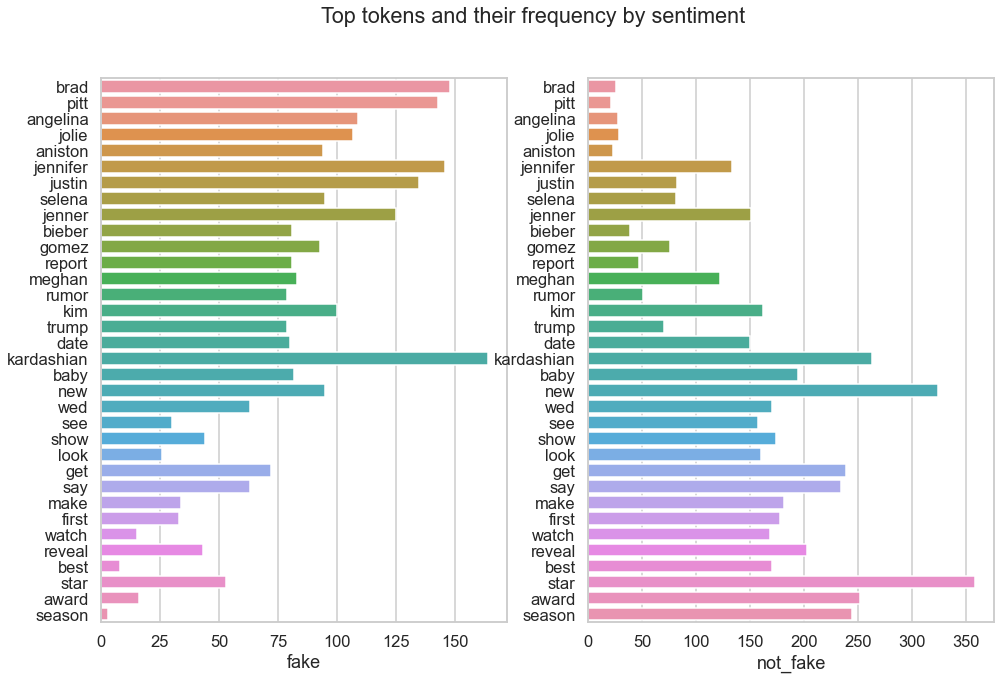

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
sns.barplot(x="fake", y=common_freq.index, data = common_freq, ax=ax[0])
sns.barplot(x="not_fake", y=common_freq.index, data = common_freq, ax=ax[1])
fig.suptitle('Top tokens and their frequency by sentiment');

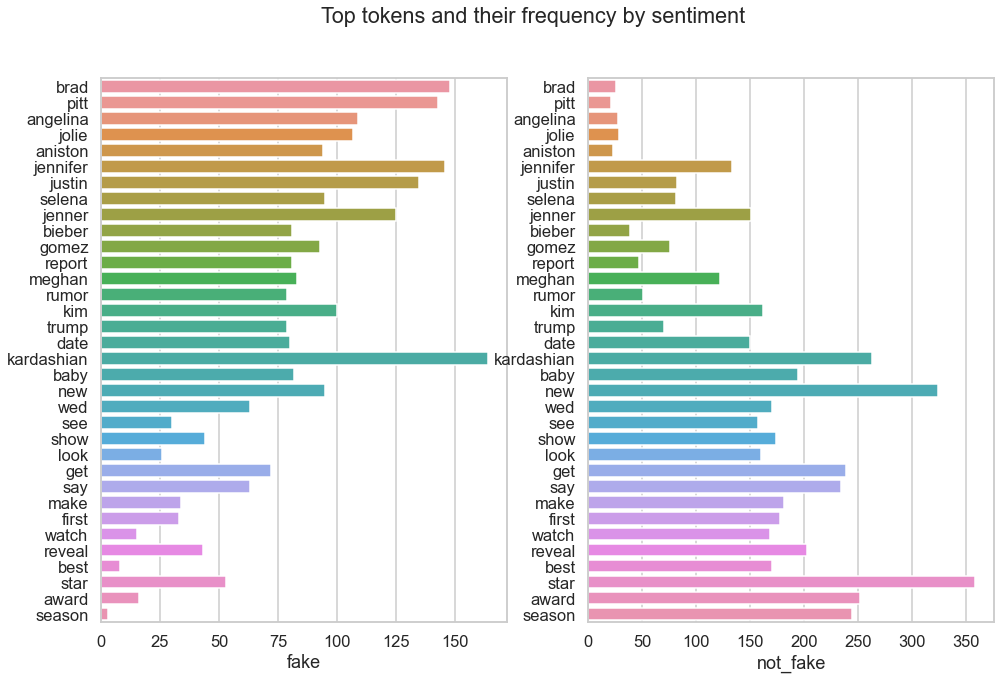

In [41]:
rest = common_freq.index
fig, ax =plt.subplots(1, 2, figsize=(16, 10))
sns.barplot(x="fake", y=rest, data = common_freq.loc[rest], ax=ax[0])
sns.barplot(x="not_fake", y=rest, data = common_freq.loc[rest], ax=ax[1])
fig.suptitle('Top tokens and their frequency by sentiment');